<a href="https://colab.research.google.com/github/Maitriksavaliya/Maitri_Meta_Scifor_Technology/blob/main/machine%20learning/simple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# simple linear regression:
it is the stastical method that is used for predictive analysis.

linear regression algo shows the linear relationship between a dependent variable (y) and one or more independent variable(x).

* y= dependent variable(target variabke)
* x= independentvariablr(predictor variable)

if single indeprndent variable is used to predict the value of the numerical dependent variable it is called simple linear regression

In [ ]:
# importing the necessory library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
# importting the data
data=pd.read_csv('/content/drive/MyDrive/Salary_dataset.csv')
data.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [ ]:
# taking predictor variable and target variable
x=data['YearsExperience'].values
y=data['Salary'].values

In [ ]:
# splitting the training and testing data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
# adding the column of ones for the intercept term
x_train=np.vstack((np.ones_like(x_train),x_train)).T
x_test=np.vstack((np.ones_like(x_test),x_test)).T

In [ ]:
# function to perfrom linear regression
def linear_regression(X, y, learning_rate, epochs):
    m, n = X.shape
    weights = np.zeros(n)  # Initialize weights with zeros
    cost_list = []
#gradient descent
    for _ in range(epochs):
        predictions = np.dot(X, weights)
        error = predictions - y
        gradient = np.dot(X.T, error) / m
        weights -= learning_rate * gradient

        # Calculate the cost
        cost = (1/(2*m)) * np.sum(error**2)
        cost_list.append(cost)

    return weights, cost_list

In [ ]:
# Train the model
learning_rate = 0.000001
epochs = 1000 # YOUR MODEL WILL GET PASS THROUGH THE DATASET 1000
weights, cost_list = linear_regression(x_train, y_train, learning_rate, epochs)
#learning rate is directly proportional to epochs

# Predict on the test set
y_pred_test = np.dot(x_test, weights)

# Calculate regression metrics

mse = np.mean((y_test - y_pred_test)**2)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(y_test - y_pred_test))
total_variance = np.sum((y_test - np.mean(y_test))**2)
r_squared = 1 - (mse / total_variance)


In [ ]:
# Print regression metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared: {r_squared}")

Mean Squared Error (MSE): 6926164012.098069
Root Mean Squared Error (RMSE): 83223.57846246501
Mean Absolute Error (MAE): 80379.09560237863
R-squared: -1.2599252855943726


In [ ]:
# Create a DataFrame to display actual values, predicted values, and differences
results_df = pd.DataFrame({
    'Actual Values': y_test,
    'Predicted Values': y_pred_test,
    'Difference (Actual - Predicted)': y_test - y_pred_test
})

# Print the DataFrame
print(results_df)

   Actual Values  Predicted Values  Difference (Actual - Predicted)
0       112636.0       4554.278911                    108081.721089
1        67939.0       2382.910573                     65556.089427
2       113813.0       3907.488342                    109905.511658
3        83089.0       2567.707878                     80521.292122
4        64446.0       1597.522025                     62848.477975
5        57190.0       1828.518657                     55361.481343


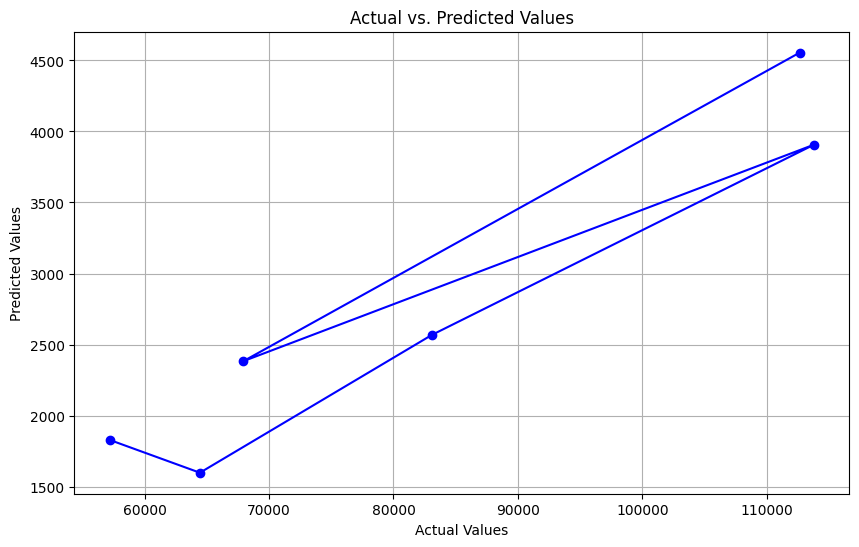

In [18]:
# Create a DataFrame
data = {
    'Actual Values': y_test,
    'Predicted Values': y_pred_test
}

df = pd.DataFrame(data)

# Create a line chart
plt.figure(figsize=(10, 6))
plt.plot(df['Actual Values'], df['Predicted Values'], marker='o', linestyle='-', color='blue')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.grid(True)

# Display the plot
plt.show()